In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

# Part C

In [198]:
# TODO adjust these hyperparameters to get a good classifier
threshold = 120
num_iter = 20
learning_rate = 0.1
reg_factor = 0.00001

In [3]:
"""
Read data from the specified training, validation and test data files.
"""

def read_data(trainFile, valFile, testFile):
    features = []
    labels = []

    # read training, test, and validation data
    for file in [trainFile, valFile, testFile]:
        # read data
        data = np.loadtxt(file)

        # transform into our feature space with "fe()"
        features.append(fe(torch.tensor(data[:,:-1])))

        labels.append(torch.tensor(data[:,-1]))
    
    return features[0], labels[0], features[1], labels[1], features[2], labels[2]

In [4]:
"""
Feature that counts the number of pixels above a specified threshold
in each row and column.
"""
def fe(X):
    # get a "binary image" indicator of pixels above and below the threshold
    X_binary = torch.where(X > threshold,
        torch.ones_like(X),torch.zeros_like(X)).reshape(-1,28,28)
    
    # calculate row and column features
    X_row = X_binary.sum(dim=1)
    X_col = X_binary.sum(dim=2)

    # include a row of ones at the end for bias
    return torch.cat([X_row, X_col, torch.ones(X_row.shape[0], 
        1, dtype=torch.float64)], dim=1)

In [5]:
"""
Convert "y" into its one-hot-encoding equivalent.
"""
def one_hot(y):
    y_one_hot = torch.zeros([y.shape[0], 10], dtype=torch.float64)
    return y_one_hot.scatter(1, y.reshape(-1, 1).to(torch.long), 1)

In [14]:
"""
Get the scores for each class for each training point.
"""
def get_scores(X, w):
    score = torch.exp(torch.mm(X,torch.transpose(w,0,1)))/torch.exp(torch.mm(X,torch.transpose(w,0,1))).sum(dim = 1,keepdim=True)
    return score

In [189]:
def train(X,y):
    # convert index labels of y into a one-hot encoding
    one_hot_y = one_hot(y)

    # loss list over iterations for plotting
    losses = []

    # initialize model weights
    w = torch.rand((10, X.shape[1]), dtype=torch.float64, requires_grad=True)

    # gradient descent loop
    # TODO for part (d): modify code below to perform stochastic gradient descent
    i = 0
    while i < num_iter:
        y_pred = torch.exp(torch.mm(X,torch.transpose(w,0,1)))/torch.exp(torch.mm(X,torch.transpose(w,0,1))).sum(dim = 1,keepdim=True)
        ls = -torch.mean(torch.sum(one_hot_y * torch.log(y_pred), dim=-1))
        loss = ls + reg_factor * torch.sum(w ** 2)
        
        # calculate loss gradient 
        loss.backward()

        # save for plotting
        #if (i+1)%5==0:
        losses.append(loss.item())

        # TODO try using different optimization methods here
        with torch.no_grad():
            w.sub_(learning_rate * w.grad)
        w.grad.data.zero_()
        
        i += 1

    return w, losses

In [11]:
def predict(X, w):
    # get scores for each class for each input
    scores = get_scores(X, w)
    # find the index of the maximum score for each input,
    # which happens to exactly correspond to the label!
    return torch.argmax(scores, dim=1)

In [9]:
"""
Evaluate the model parameterized by "w", using unseen data features "X" and
corresponding labels "y".
"""
def evaluate(X, y, w):
    # use model to get predictions
    predictions = predict(X, w)
    
    # total number of items in dataset
    total = y.shape[0]

    # number of correctly labeled items in dataset
    correct = torch.sum(predictions == y.long())

    # return fraction of correctly labeled items in dataset
    return float(correct) / float(total),predictions

Dimenison of X:  torch.Size([2000, 57])
Validation accuracy: 0.544


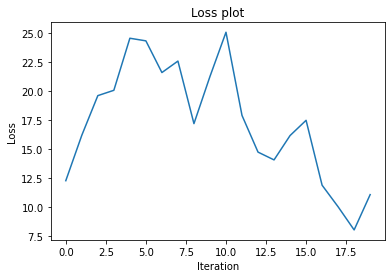

In [145]:
if __name__ == "__main__":
    # load data from file
    train_vec, train_lab, val_vec, val_lab, test_vec, test_lab = read_data('hw0train.txt','hw0validate.txt', 'hw0test.txt')

    print('Dimenison of X: ',train_vec.shape)

    # find w through gradient descent
    w, losses = train(train_vec,train_lab)

    # evaluate model on validation data
    accuracy,m = evaluate(val_vec, val_lab, w)

    print("Validation accuracy: {}".format(accuracy))

    # plot losses
    plt.plot(losses)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Loss plot")
    plt.show()

## Value of Parameter for which we get best Accuracy
### lambda : 0.00001
### learning_rate : 0.1
### threshold : 120
### num_iter : 20


# Part D

In [46]:
# TODO adjust these hyperparameters to get a good classifier
threshold = 120
num_iter_sgd = 20
learning_rate_sgd = 0.00003
reg_factor_sgd = 0.000001

In [187]:
def train_sgd(X,y):
    # convert index labels of y into a one-hot encoding
    one_hot_y = one_hot(y)

    # loss list over iterations for plotting
    losses = []

    # initialize model weights
    w = torch.rand((10, X.shape[1]), dtype=torch.float64, requires_grad=True)

    # gradient descent loop
    k = 0
    while k < num_iter_sgd:
      for i,j in zip(X,one_hot_y):
        y_pred = torch.exp(torch.matmul(i,torch.transpose(w,0,1)))/torch.sum(torch.exp(torch.matmul(i,torch.transpose(w,0,1))))
        ls = -torch.mean(torch.sum(j * torch.log(y_pred.view(-1))))
        loss = ls+ reg_factor_sgd * torch.sum(w ** 2)
        
        # calculate loss gradient 
        loss.backward()

        # save for plotting
        # TODO try using different optimization methods here
        with torch.no_grad():
            w.sub_(learning_rate_sgd * w.grad)
        w.grad.data.zero_()
        
        
      losses.append(loss.item())  
      k += 1

    return w, losses

Dimenison of X:  torch.Size([2000, 57])
Validation accuracy: 0.414


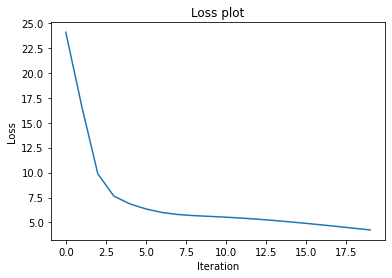

In [190]:
if __name__ == "__main__":
    # load data from file
    train_vec, train_lab, val_vec, val_lab, test_vec, test_lab = read_data('hw0train.txt','hw0validate.txt', 'hw0test.txt')
    print('Dimenison of X: ',train_vec.shape)
    # find w through gradient descent
    w_sgd, losses_sgd = train_sgd(train_vec,train_lab)

    # evaluate model on validation data
    accuracy,m = evaluate(val_vec, val_lab, w_sgd)

    print("Validation accuracy: {}".format(accuracy))

    # plot losses
    plt.plot(losses_sgd)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Loss plot")
    plt.show()

# Best Parameters for the Part D
### lambda : 0.000001
### learning_rate :  0.00003
### threshold : 150
### num_iter : 20

# Part E

In [51]:
# TODO adjust these hyperparameters to get a good classifier
threshold = 150
num_iter_E = 60
learning_rate_E = 0.1
reg_factor_E = 0.01

In [52]:
def train_E(X,y):
    # convert index labels of y into a one-hot encoding
    one_hot_y = one_hot(y)

    # loss list over iterations for plotting
    losses = []

    # initialize model weights
    w = torch.rand((10, X.shape[1]), dtype=torch.float64, requires_grad=True)
    model  = [w]

    optimizer = torch.optim.Adagrad(model,lr=learning_rate_E) # Optimizer used Adagrad
    # gradient descent loop
    i = 0
    while i < num_iter_E:
        optimizer.zero_grad()

        y_pred = torch.exp(torch.mm(X,torch.transpose(w,0,1)))/torch.exp(torch.mm(X,torch.transpose(w,0,1))).sum(dim = 1,keepdim=True)
        ls = -torch.mean(torch.sum(one_hot_y * torch.log(y_pred), dim=-1))
        loss = ls+ reg_factor_E * torch.sum(w ** 2)
        
        # calculate loss gradient 
        loss.backward()
        optimizer.step()
        # save for plotting
        losses.append(loss.item())
        
        i += 1

    return w, losses

Dimenison of X:  torch.Size([2000, 57])
Validation accuracy: 0.624


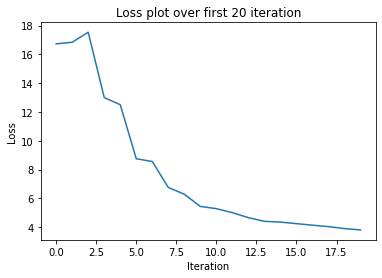

In [53]:
if __name__ == "__main__":
    # load data from file
    train_vec, train_lab, val_vec, val_lab, test_vec, test_lab = read_data('hw0train.txt','hw0validate.txt', 'hw0test.txt')
    print('Dimenison of X: ',train_vec.shape)
    # find w through gradient descent
    w_sgd, losses_E = train_E(train_vec,train_lab)

    # evaluate model on validation data
    accuracy,m = evaluate(val_vec, val_lab, w_sgd)

    print("Validation accuracy: {}".format(accuracy))

    # plot losses
    plt.plot(losses_E[:20])
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Loss plot over first 20 iteration")
    plt.show()

# We can see that out accuracy increase by more than 0.5% 
### lamda : 0.01
### learning_rate : 0.1
### threshold: 150
### num_iteration : 60
### optimizer used : Adagrad